In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv("F:/Datasets/House Prices/train.csv")
test = pd.read_csv("F:/Datasets/House Prices/test.csv")
test_id = test['Id']

Information about the type of attributes and features of the dataset. Also contains info about missing values.

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Numerical and Categorical features

In [5]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [6]:
print(train[numerical_feats].columns)
print("*"*100)
print(train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

Dealing with missing values

In [7]:
(train.isnull().sum()/len(train)).sort_values(ascending=False)[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [8]:
missing_percentage=(train.isnull().sum()/len(train)).sort_values(ascending=False)[:20]
missing_percentage

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

Dropping columns with missing percentages greater than 15%

In [9]:
train=train.drop(missing_percentage.index[:6],1)
test=test.drop(missing_percentage.index[:6],1)

In [10]:
cols = train[missing_percentage.index[6:]].columns
num_cols = train[missing_percentage.index[6:]]._get_numeric_data().columns
print("Numerical Columns",num_cols)
cat_cols=list(set(cols) - set(num_cols))
print("Categorical Columns:",cat_cols)

Numerical Columns Index(['GarageYrBlt', 'MasVnrArea'], dtype='object')
Categorical Columns: ['BsmtExposure', 'GarageCond', 'GarageFinish', 'BsmtFinType2', 'GarageQual', 'BsmtCond', 'MasVnrType', 'BsmtQual', 'Utilities', 'GarageType', 'Electrical', 'BsmtFinType1']


For the numerical columns, we fill in the median for corresponding missing values.

In [11]:
train['GarageYrBlt']=train.groupby('Neighborhood')['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))
train['MasVnrArea']=train.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

Text(0.5,0.98,'Distribution of data after Filling missing values')

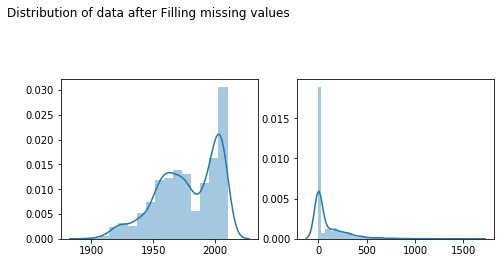

In [12]:
plt.figure(figsize=[12,10])
plt.subplot(332)
sns.distplot(train['GarageYrBlt'].values)
plt.subplot(333)
sns.distplot(train['MasVnrArea'].values)
plt.suptitle("Distribution of data after Filling missing values")

Doing the same for the test set.

In [13]:
test['GarageYrBlt']=test.groupby('Neighborhood')['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))
test['MasVnrArea']=test.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

For categorical variables, we impute by using the mode which is the most common way to deal with categorical variables

In [15]:
for column in cat_cols:
    train[column]=train.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.mode()))
    test[column]=test.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.mode()))

Finding the numerical and categorical variables

For all the categorical attributes, we will have to convert the categorical data into a more usable form for our regressor.
So we use the 'Label Encoder' function from sklearn library to replace the labels with meaningful values 

In [16]:
cols = train.columns
num_cols = train._get_numeric_data().columns
print("Numerical Columns",num_cols)
cat_cols=list(set(cols) - set(num_cols))
print("Categorical Columns:",cat_cols)

Numerical Columns Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Columns: ['GarageFinish', 'GarageQual', 'SaleType', 'BsmtCond', 'LotShape', 'MasVnrType', 'BsmtQual', 'HeatingQC', 'RoofMatl', 'Foundation', 'Neighborhood', 'BsmtExposure', 'Exterior1st', 'LotConfig', 'RoofStyle', 'Condition2', 'Condition1', 'GarageType', 'ExterCond', 'ExterQual', 'CentralAir', 'MSZoning', 'Utilities', 'Electrical', 'Functional', 'SaleCondition', 'BsmtFinType1', 'Bsmt

In [17]:
for i in cat_cols:
    train[i]=LabelEncoder().fit_transform(train[i].astype(str)) 
    test[i]=LabelEncoder().fit_transform(test[i].astype(str))

Now, we check the correlation between the various features by plotting the correlation matrix. High positive correlation is
represented with a darker shade whereas high negative correlation is represented with a lighter shade.

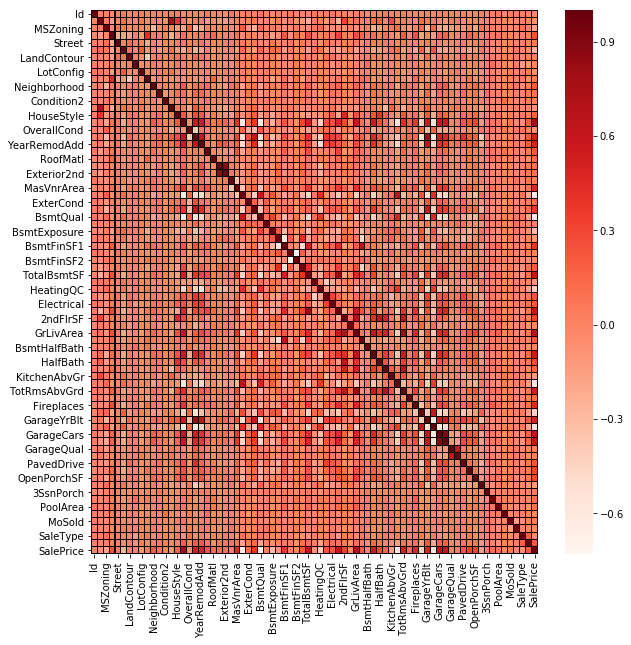

In [18]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(),ax=ax,annot= False,linewidth= 0.02,linecolor='black',fmt='.2f',cmap = 'Reds')
plt.show()

We will find the correlation between the features and the target feature/attribute(SalePrice)

Text(0.5,1,'Correlation Plot')

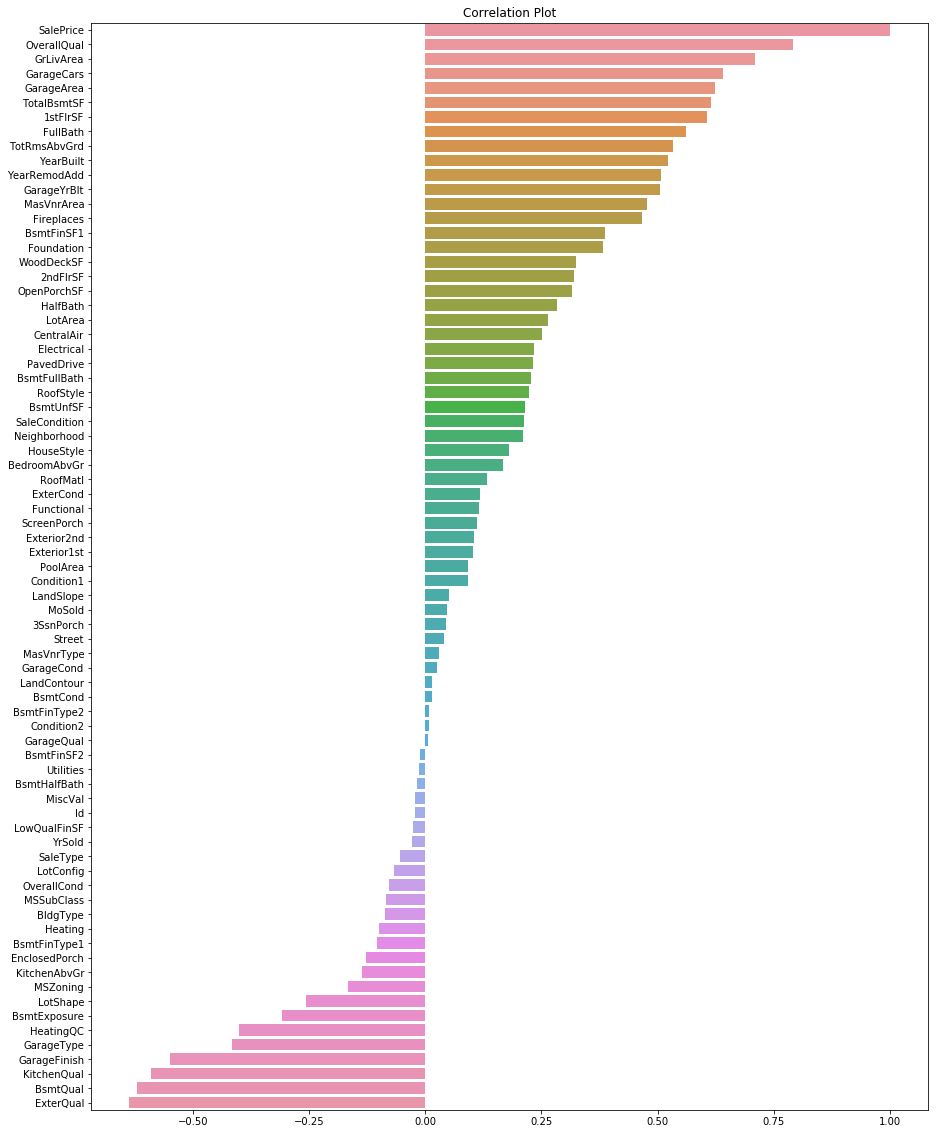

In [19]:
corr=train.corr()
corr=corr.sort_values(by=["SalePrice"],ascending=False).iloc[0].sort_values(ascending=False)
plt.figure(figsize=(15,20))
sns.barplot(x=corr.values, y=corr.index.values);
plt.title("Correlation Plot")

Some of the attributes like 'OverallQual', 'GrLivArea', 'GarageCars' etc have a very high positive correlation with 'SalePrice'.
This means that all these attributes are in a direct relationship and changes in 'SalePrice' are represented in a similar way in
these other attributes.

Some other attributes like 'BsmtQual', 'GarageFinish' etc have a very high negative correlation with 'SalePrice'. This means that
all these attributes are in an inverse relationship with 'SalePrice'.

Some histograms representing the various features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6E0B7D7F0>,
      dtype=object)

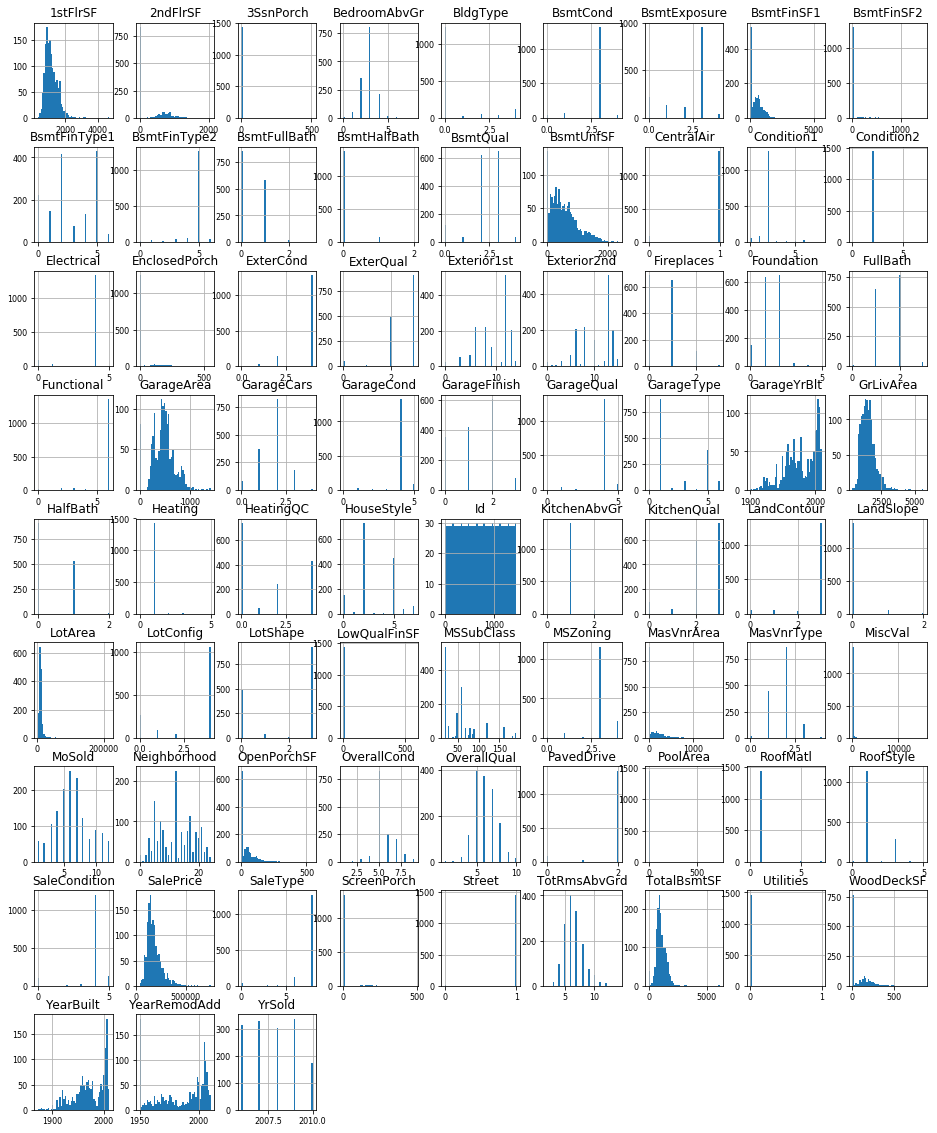

In [20]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int32
LotArea          1460 non-null int64
Street           1460 non-null int32
LotShape         1460 non-null int32
LandContour      1460 non-null int32
Utilities        1460 non-null int32
LotConfig        1460 non-null int32
LandSlope        1460 non-null int32
Neighborhood     1460 non-null int32
Condition1       1460 non-null int32
Condition2       1460 non-null int32
BldgType         1460 non-null int32
HouseStyle       1460 non-null int32
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int32
RoofMatl         1460 non-null int32
Exterior1st      1460 non-null int32
Exterior2nd      1460 non-null int32
MasVnrType       1460 non-null int32
MasVn

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int32
LotArea          1459 non-null int64
Street           1459 non-null int32
LotShape         1459 non-null int32
LandContour      1459 non-null int32
Utilities        1459 non-null int32
LotConfig        1459 non-null int32
LandSlope        1459 non-null int32
Neighborhood     1459 non-null int32
Condition1       1459 non-null int32
Condition2       1459 non-null int32
BldgType         1459 non-null int32
HouseStyle       1459 non-null int32
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int32
RoofMatl         1459 non-null int32
Exterior1st      1459 non-null int32
Exterior2nd      1459 non-null int32
MasVnrType       1459 non-null int32
MasVn

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [24]:
test.fillna(test.mean(), inplace=True)

In [25]:
X = train.iloc[:, :-1].values
y = train.iloc[:, 74].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
y_train.shape

(1168,)

In [28]:
mean = 0
for i in y_train:
    mean += i
mean = mean/y_train.shape[0]

In [29]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)

In [32]:
predictions[predictions < 0] = mean

In [33]:
from sklearn.metrics import mean_squared_log_error
import math

val = mean_squared_log_error(predictions,  y_test)
print(math.sqrt(val))

0.21280296059766438


In [34]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

predictions1 = dt_model.predict(X_test)

In [35]:
val = mean_squared_log_error(predictions1,  y_test)
print(math.sqrt(val))

0.23110328951923026


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = DecisionTreeRegressor()

rf_model.fit(X_train, y_train)

predictions2 = rf_model.predict(X_test)

In [38]:
val = mean_squared_log_error(predictions2,  y_test)
print(math.sqrt(val))

0.19757258232784009


In [39]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()

xg_model.fit(X_train, y_train)

predictions3 = xg_model.predict(X_test)

In [40]:
val = mean_squared_log_error(predictions3,  y_test)
print(math.sqrt(val))

0.1318589309541445


In [42]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()

lgbm_model.fit(X_train, y_train)

predictions4 = lgbm_model.predict(X_test)

In [43]:
val = mean_squared_log_error(predictions4,  y_test)
print(math.sqrt(val))

0.13639658453077716


In [ ]:
#End


#############################################################################
############################################################################
###########################################################################

In [ ]:
## Read if you believe you can

In [207]:
dataset.drop(dataset.select_dtypes(['object']), inplace=True, axis=1)

In [208]:
test.drop(test.select_dtypes(['object']), inplace = True, axis=1)

In [209]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [210]:
dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [211]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 37].values

In [212]:
X_test = test.iloc[:, :].values

In [213]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1444 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1457 non-null float64
BsmtHalfBath     1457 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

In [214]:
#X.astype(int)

In [215]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [216]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
#X_train = my_imputer.fit_transform(X_train)
#X_test = my_imputer.transform(X_test)
X = my_imputer.fit_transform(X)
X_test = my_imputer.fit_transform(X_test)

In [218]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
regressor = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(regressor,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   23.1s finished


0.8675660526544269
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [219]:
#regressor.fit(X,y)

In [221]:

y_test = xgb_grid.predict(X_test)

In [222]:
#accuracy = regressor.score(X_test,y_test)
#print(accuracy*100,'%')

In [223]:
#y_pred[:10]

In [224]:
#y_test[:10]

In [225]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test, y_pred)

In [226]:
"""import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_test, y_pred):
	assert len(y_test) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y_test[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y_test))) ** 0.5"""

'import math\n\n#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)\ndef rmsle(y_test, y_pred):\n\tassert len(y_test) == len(y_pred)\n\tterms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y_test[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]\n\treturn (sum(terms_to_sum) * (1.0/len(y_test))) ** 0.5'

In [227]:
#rmsle(y_test, y_pred)

In [228]:
X_test

array([[1.461e+03, 2.000e+01, 8.000e+01, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [1.462e+03, 2.000e+01, 8.100e+01, ..., 1.250e+04, 6.000e+00,
        2.010e+03],
       [1.463e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 3.000e+00,
        2.010e+03],
       ...,
       [2.917e+03, 2.000e+01, 1.600e+02, ..., 0.000e+00, 9.000e+00,
        2.006e+03],
       [2.918e+03, 8.500e+01, 6.200e+01, ..., 7.000e+02, 7.000e+00,
        2.006e+03],
       [2.919e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 1.100e+01,
        2.006e+03]])

In [230]:
predictions = xgb_grid.predict(X_test)

"""predictions = (np.exp(predictions))
submission = pd.DataFrame({
        "Id": test_id,
        "SalePrice": predictions
})

submission.to_csv('F:/submission_house_prices.csv', index=False)"""

'predictions = (np.exp(predictions))\nsubmission = pd.DataFrame({\n        "Id": test_id,\n        "SalePrice": predictions\n})\n\nsubmission.to_csv(\'F:/submission_house_prices.csv\', index=False)'

In [231]:
predictions

array([130514.61, 161747.58, 180340.6 , ..., 178999.95, 118247.56,
       238257.33], dtype=float32)

In [232]:
submission = pd.DataFrame({
        "Id": test_id,
        "SalePrice": predictions
})

submission.to_csv('F:/submission_house_prices.csv', index=False)

In [233]:
submission

,Id,SalePrice
0,1461,130514.609375
1,1462,161747.578125
2,1463,180340.593750
3,1464,186593.734375
4,1465,182569.093750
5,1466,179735.156250
6,1467,174722.546875
7,1468,169535.281250
8,1469,178418.781250
9,1470,118679.632812
